<a href="https://colab.research.google.com/github/JapiKredi/RAG_from_scratch_langchain/blob/main/RAG_from_scratch_langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a RAG application from scratch with Langchain

1: Ingestion     

2: Retrieval

3: Generation

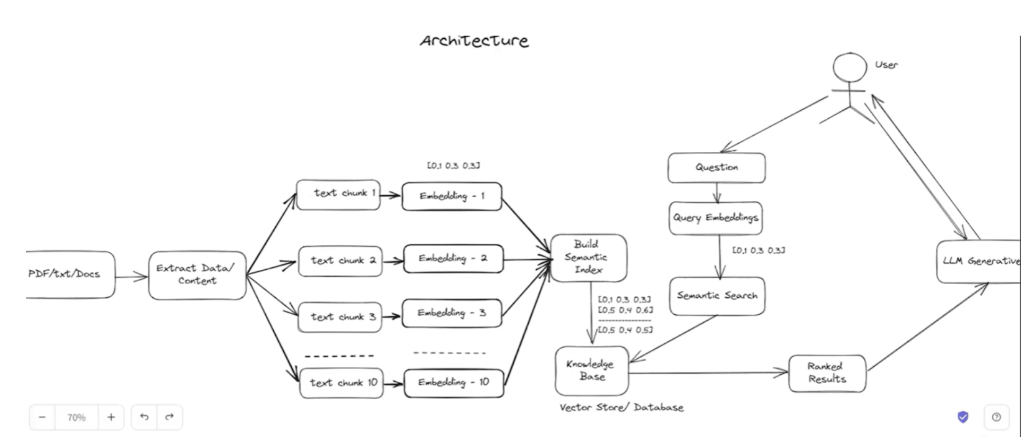

1: Ingestion     
a. loading the data: text, pdf, webpage, csv-file, etc
b. chunking
c. embedding
d. database (vector db, nosql or hybrid (vctor-db + nosql)

2: Retrieval
a. sementic search (= similarity search), index, rank results

3: Generation
b. passing the results to the LLM

In [2]:
corpus_of_documents = [
    "Take a stroll along the beach and feel the sand between your toes.",
    "Explore a nearby forest and marvel at the towering trees.",
    "Join a photography club and capture the beauty of the world.",
    "Volunteer at a local charity and make a positive difference.",
    "Attend a cooking class and learn to create delicious dishes.",
    "Visit an art gallery and immerse yourself in creativity.",
    "Go on a road trip and discover hidden gems along the way.",
    "Take a dance lesson and let music guide your movements.",
    "Host a game night with friends and enjoy friendly competition.",
    "Attend a meditation retreat and find inner peace."
]

In [3]:
corpus_of_documents

['Take a stroll along the beach and feel the sand between your toes.',
 'Explore a nearby forest and marvel at the towering trees.',
 'Join a photography club and capture the beauty of the world.',
 'Volunteer at a local charity and make a positive difference.',
 'Attend a cooking class and learn to create delicious dishes.',
 'Visit an art gallery and immerse yourself in creativity.',
 'Go on a road trip and discover hidden gems along the way.',
 'Take a dance lesson and let music guide your movements.',
 'Host a game night with friends and enjoy friendly competition.',
 'Attend a meditation retreat and find inner peace.']

In [5]:
user_query = "i am an indian and i live in india"

In [6]:
document = "india is a country for indians and for everyone"

In [7]:
from collections import Counter
import math

In [8]:
query_tokens=user_query.lower().split(" ")

In [9]:
query_tokens

['i', 'am', 'an', 'indian', 'and', 'i', 'live', 'in', 'india']

In [10]:
document_tokens = document.lower().split(" ")

In [11]:
document_tokens

['india', 'is', 'a', 'country', 'for', 'indians', 'and', 'for', 'everyone']

In [12]:
query_counter=Counter(query_tokens)

In [13]:
document_counter=Counter(document_tokens)

In [14]:
document_counter

Counter({'india': 1,
         'is': 1,
         'a': 1,
         'country': 1,
         'for': 2,
         'indians': 1,
         'and': 1,
         'everyone': 1})

In [15]:
embed=[]
for token in  query_counter.keys():
  embed.append(query_counter[token])

In [16]:
user_query

'i am an indian and i live in india'

In [17]:
embed

[2, 1, 1, 1, 1, 1, 1, 1]

In [18]:
embed2=[]
for token in  document_counter.keys():
  embed2.append(document_counter[token])

In [19]:
embed2

[1, 1, 1, 1, 2, 1, 1, 1]

# Cosine similarity

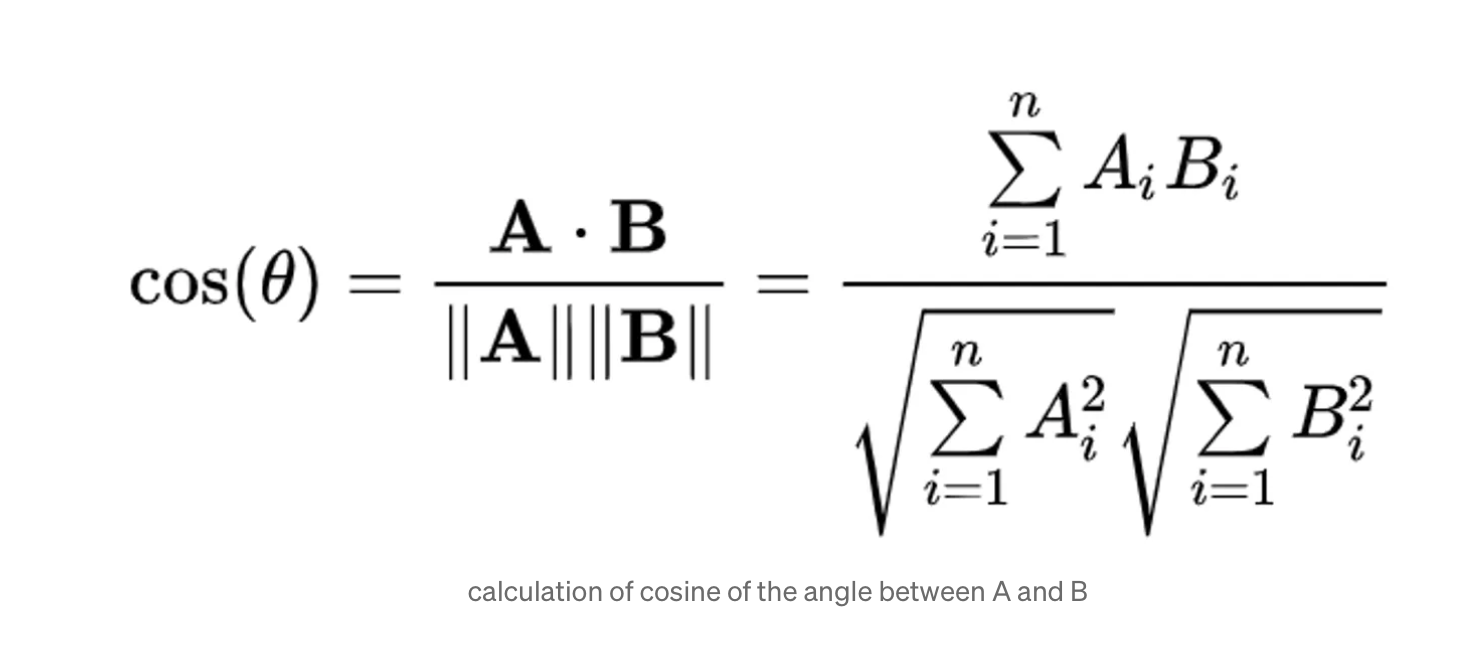

In [20]:
user_query

'i am an indian and i live in india'

In [21]:
document

'india is a country for indians and for everyone'

In [22]:
for tokens in query_counter & document_counter.keys():
  print(tokens)

and
india


In [23]:
user_query2 = 'i am an indian and i live in india and i love indian food'

In [24]:
query2_tokens = user_query2.lower().split(" ")

In [33]:
query2_counter = Counter(query2_tokens)

In [26]:
document

'india is a country for indians and for everyone'

In [27]:
document2 = "india is a country for indians and for everyone and for those who loves indian food"

In [28]:
document2_tokens = document2.lower().split(" ")

In [31]:
document2_counter = Counter(document2_tokens)

In [32]:
document2_counter

Counter({'india': 1,
         'is': 1,
         'a': 1,
         'country': 1,
         'for': 3,
         'indians': 1,
         'and': 2,
         'everyone': 1,
         'those': 1,
         'who': 1,
         'loves': 1,
         'indian': 1,
         'food': 1})

In [30]:
# similarity score between this user_query and this document

In [34]:
for tokens in query2_counter.keys() & document2_counter.keys():
  print(tokens)

and
india
indian
food


In [35]:
mylist=[]
for tokens in query_counter.keys() & document_counter.keys():
    mylist.append(query_counter[tokens]*document_counter[tokens])

In [36]:
mylist

[1, 1]

In [37]:
mylist2=[]
for tokens in query2_counter.keys() & document2_counter.keys():
    mylist2.append(query2_counter[tokens]*document2_counter[tokens])

In [38]:
mylist2

[4, 1, 2, 1]

In [51]:
dot_prod=sum(mylist)

In [48]:
query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))

In [41]:
document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

In [42]:
similarity=(dot_prod)/(query_magnitude*document_magnitude)

In [43]:
similarity

0.18181818181818182

In [44]:
mylist2

[4, 1, 2, 1]

In [50]:
dot_prod2=sum(mylist2)

In [47]:
query2_magnitude = math.sqrt(sum(query2_counter[token] ** 2 for token in query2_counter))

In [49]:
document2_magnitude = math.sqrt(sum(document2_counter[token] ** 2 for token in document2_counter))

In [52]:
similarity2 = (dot_prod)/(query2_magnitude*document2_magnitude)

In [53]:
similarity2

0.08333333333333334

In [54]:
def cosine_similarity(query, document):
    # Tokenize and convert to lowercase
    query_tokens = query.lower().split(" ")
    document_tokens = document.lower().split(" ")

    # Create Counters for query and document
    query_counter = Counter(query_tokens)
    document_counter = Counter(document_tokens)

    # Calculate dot product
    dot_product = sum(query_counter[token] * document_counter[token] for token in query_counter.keys() & document_counter.keys())

    # Calculate magnitudes
    query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))
    document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

    # Calculate cosine similarity
    similarity = dot_product / (query_magnitude * document_magnitude) if query_magnitude * document_magnitude != 0 else 0

    return similarity

In [56]:
user_query = "is sunny good data scientist and genai engineer?"

In [57]:
user_query = "is sunny good with cooking skiils?"

In [58]:
document = "sunny is a genai engineer and he is very good with data science and machine learning"

In [59]:
cosine_similarity(user_query,document)

0.45643546458763845

In [60]:
document = "sunny is a genai engineer and he is very good with data science and machine learning"

In [61]:
user_query = "I love India and i love Indian food"

In [62]:
cosine_similarity(user_query,document)

0.12909944487358055

# Creating a RAG

In [63]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

In [64]:
!pip install --upgrade openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00


In [65]:
from openai import OpenAI
client = OpenAI(api_key=OPENAI_API_KEY)

In [66]:
completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."},
    {"role": "user", "content": "Compose a poem that explains the concept of recursion in programming."}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content="In the realm of code, a loop of mystery,\nLies a concept profound, known as recursion's history.\nLike a mirror reflecting its own image in sight,\nA function calls itself, a recursive delight.\n\nInto the depths of the stack, it travels deep,\nUnraveling complexities in a cyclic leap.\nWith each iteration, a problem it breaks,\nUntil the base case its journey finally takes.\n\nA dance of logic, echoing in the void,\nRevealing patterns that are often deployed.\nInfinite processes, within a finite frame,\nRecursion in programming, a beautifully complex game.\n\nSo heed the call of recursion's embrace,\nAnd watch as elegance and power interlace.\nFor in the world of code, where possibilities reign,\nRecursion's poetry, a true programming domain.", role='assistant', function_call=None, tool_calls=None)


In [67]:
completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a helpful assistant, specialised in Indian politics"},
    {"role": "user", "content": "Who will be the prime minister of India in 2024."}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content="I'm unable to predict the future, including who will be the Prime Minister of India in 2024. The Prime Minister of India is elected through a democratic process, and it will depend on the outcome of the 2024 general elections.", role='assistant', function_call=None, tool_calls=None)


In [68]:
def return_response(query, corpus):
    similarities = []
    for doc in corpus:
        similarity = cosine_similarity(query, doc)
        similarities.append(similarity)
    return corpus_of_documents[similarities.index(max(similarities))]

In [69]:
corpus_of_documents = [
    "Take a stroll along the beach and feel the sand between your toes.",
    "Explore a nearby forest and marvel at the towering trees.",
    "Join a photography club and capture the beauty of the world.",
    "Volunteer at a local charity and make a positive difference.",
    "Attend a cooking class and learn to create delicious dishes.",
    "Visit an art gallery and immerse yourself in creativity.",
    "Go on a road trip and discover hidden gems along the way.",
    "Take a dance lesson and let music guide your movements.",
    "Host a game night with friends and enjoy friendly competition.",
    "Attend a meditation retreat and find inner peace."
]

In [70]:
user_query="is meditation good for inner peace?"

In [71]:
return_response(user_query, corpus_of_documents)

'Attend a meditation retreat and find inner peace.'

In [72]:
user_query="how to cook delicious?"

In [73]:
return_response(user_query, corpus_of_documents)

'Attend a cooking class and learn to create delicious dishes.'

In [74]:
user_query="how to find hidden gem?"

In [75]:
return_response(user_query, corpus_of_documents)

'Attend a meditation retreat and find inner peace.'

In [76]:
query="how to play the night games?"

In [77]:
return_response(query, corpus_of_documents)

'Join a photography club and capture the beauty of the world.'

In [78]:
query='How to spend fun time with friends?'

In [79]:
return_response(query, corpus_of_documents)

'Attend a cooking class and learn to create delicious dishes.'

In [80]:
full_response = []

In [81]:
prompt = """
You are a bot that makes recommendations for activities. You answer in very short sentences and do not include extra information.
This is the recommended activity: {relevant_document}
The user input is: {user_input}
Compile a recommendation to the user based on the recommended activity and the user input.
"""

In [82]:
relevant_document=return_response(query, corpus_of_documents)

In [89]:
relevant_document

'Attend a cooking class and learn to create delicious dishes.'

In [83]:
user_input=""

In [84]:
prompt = f"""
This is the given information: {relevant_document}
The user input is: {user_input}
Compile a final information to the user based on the given information and the user input.
"""

In [87]:
completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a friendly bot."},
    {"role": "user", "content":prompt }
  ]
)

In [88]:
print(completion.choices[0].message.content)

Final Information: We recommend that you attend a cooking class to learn how to create delicious dishes. It's a great opportunity to pick up new recipes and culinary skills that you can use to impress your friends and family. Enjoy the experience and have fun exploring the world of cooking!
